# XGB test


In [1]:
%load_ext autoreload
%autoreload 2

# %matplotlib widget

In [14]:
import pandas as pd

import seaborn as sns

from math import log, pi, sin

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

import itertools

from xgboost import XGBRegressor

from plots2.consts import (
    SMALL_FONT,
    MEDIUM_FONT,
    BIGGER_FONT,
)

from plots2.fns import get_corner_annotations_custom_labels

# Dummy data

In [3]:
np.random.seed(2)

In [4]:
x = list(np.random.uniform(0, pi, 1000))

In [5]:
x.sort()

x = np.array(x)

In [6]:
# y = np.vectorize(lambda x: x**0.5)(x) + np.random.normal(0,0.02,len(x))

# y = np.vectorize(lambda x: x)(x) + np.random.normal(0, 0.001, len(x))

y = np.vectorize(sin)(x) + np.random.normal(0,0.02,len(x))

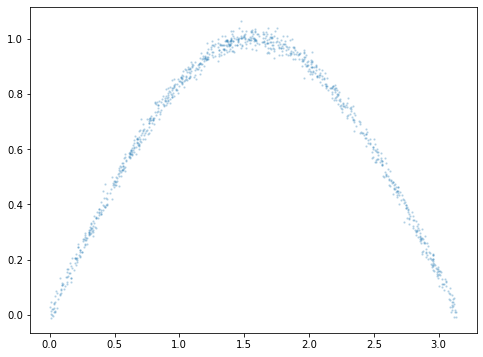

In [7]:
f, ax = plt.subplots(figsize=(8,6))

ax.scatter(x, y, s=2, alpha=0.2)

In [50]:
pd.DataFrame(dict(
    x = np.random.normal(0,0.02,10000),
    y = 0.02*np.random.normal(0,1,10000)
)).describe()

,x,y
count,10000.000000,10000.000000
mean,-0.000024,0.000089
std,0.020007,0.019857
min,-0.073289,-0.078186
25%,-0.013559,-0.013313
50%,-0.000193,0.000156
75%,0.013519,0.013157
max,0.077950,0.080457


# Model

In [8]:
X = np.vstack(x)

In [9]:
PARS = dict(
    objective='reg:pseudohubererror',
    tree_method='exact',
    learning_rate=0.3,
)

In [10]:
NCOLS = 8

In [11]:
y_nes = []

for ne in range(NCOLS*2):
    xgbne = XGBRegressor(
        n_estimators=ne,
        max_depth=1,
        **PARS,
    ).fit(X, y)
    
    yp = xgbne.predict(X)
    
    y_nes.append(yp)

# Plot

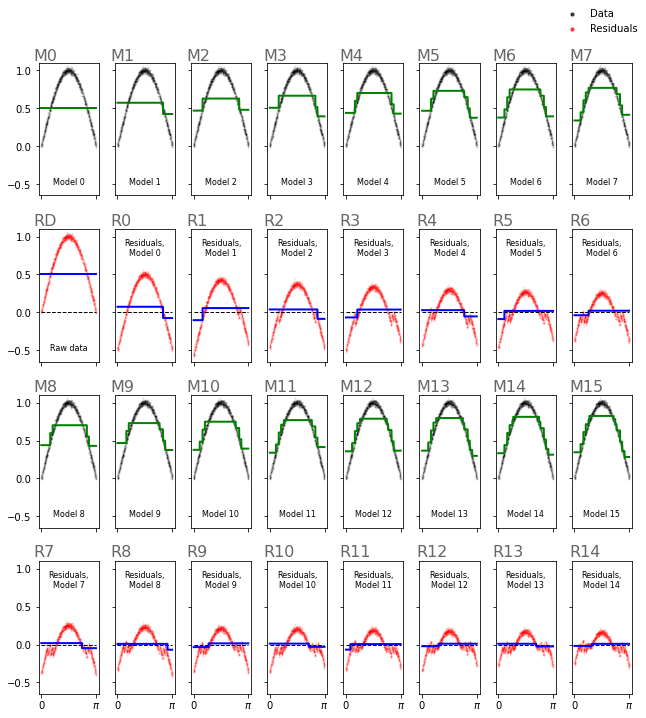

In [45]:
f, ax = plt.subplots(4, NCOLS, figsize=(9,10))

plt.rc('font', size=SMALL_FONT)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_FONT)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_FONT)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_FONT)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_FONT)  # fontsize of the figure title




ss = 1
ab = 0.1
ar = 0.1




# ROW1
for ii in range(NCOLS):
    if ii==0:
        label = 'Data'
    else:
        label = None

    ax[0][ii].scatter(x, y, c='black', s=ss, alpha=ab, label=label)
    ax[0][ii].plot(x, y_nes[ii], c='green', lw=2)

    
x_outer = [x[0], x[-1]]
y0 = [0, 0]

# ROW2
for ii in range(NCOLS):
    if ii==0:
        label = 'Residuals'
    else:
        label = None

    if ii>0:
        y_plot = y-y_nes[ii-1]
    else:
        y_plot = y
    
    ax[1][ii].scatter(x, y_plot, c='red', s=ss, alpha=ar, label=label)

    
    ax[1][ii].plot(x_outer, y0, c='black', lw=1, ls='--')


ax[1][0].plot(x, y_nes[0], c='blue', lw=2)

for ii in range(NCOLS-1):
    ax[1][ii+1].plot(x, y_nes[ii+1]-y_nes[ii], c='blue', lw=2)


    
    
    
# ROW3
for ii in range(NCOLS):
    ax[2][ii].scatter(x, y, c='black', s=ss, alpha=ab)
    ax[2][ii].plot(x, y_nes[ii+4], c='green', lw=2)


# ROW4
for ii in range(NCOLS):
    ax[3][ii].scatter(x, y-y_nes[ii+NCOLS-2], c='red', s=ss, alpha=ar)
    
    ax[3][ii].plot(x_outer, y0, c='black', lw=1, ls='--')

for ii in range(NCOLS):
    ax[3][ii].plot(x, y_nes[ii+NCOLS]-y_nes[ii+NCOLS-1], c='blue', lw=2)

    
    
    
    
    
    
# LAYOUT

fs = 8

for ii, jj in itertools.product(range(4), range(NCOLS)):
    ax[ii][jj].set_xticks([0,pi])

    lower = -0.65
    upper = 1.1
    
    ax[ii][jj].set_ylim([lower, upper])
    
    if jj!=0:
        ax[ii][jj].set_yticklabels([])
        
    if ii!=3:
        ax[ii][jj].set_xticklabels([])
    else:
        ax[ii][jj].set_xticklabels([0, r'$\pi$'])

        
        
        
    xtext = 0.5*pi
    
    if ii==3 or ii==1:
        ytext = 0.75
    else:
        ytext = -0.5
    
    if ii % 2:
        tt = 'Residuals,\nModel ' + str(NCOLS * (ii // 2) + jj-1)
    else:
        tt = 'Model ' + str(NCOLS * (ii // 2) + jj)
            
            
            
    if ii==1 and jj==0:
        # xtext = 0.5*pi - 1
        ytext = -0.5
        ax[ii][jj].annotate('Raw data', (xtext, ytext), fontsize=fs, ha='center')
        
    else:
        ax[ii][jj].annotate(tt, (xtext, ytext), fontsize=fs, ha='center')

    

    

plt.tight_layout(rect= [0, 0, 1, 0.93], h_pad=3)


leg = f.legend(
    loc=1,
    framealpha=0,
)

for lh in leg.legendHandles: 
    lh.set_alpha(0.7)

leg.legendHandles[0]._sizes = [10]
leg.legendHandles[1]._sizes = [10]




labs = [
    'M' + str(ii) for ii in range(8)] + ['RD'] + [
    'R' + str(ii) for ii in range(7)] + [
    'M' + str(ii) for ii in range(8,16)] + [
    'R' + str(ii) for ii in range(7, 15)
]

get_corner_annotations_custom_labels(8, 4, 0.052, 0.914, 0.118, 0.23, plt, labs)

In [46]:
f.savefig('../figures/paper/xgb.jpg', dpi=1200, bbox_inches="tight")